In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as myimg
%matplotlib inline

In [4]:
from sklearn import svm, tree

In [5]:
train = pd.read_csv("/home/dheer1206/Downloads/datasets/hand/train.csv")

In [6]:
print (train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [7]:
features = np.array(train.iloc[ : , 1: ])

In [8]:
target = np.array(train.iloc[ : , :1 ])

In [9]:
features.shape

(42000, 784)

In [10]:
target.shape

(42000, 1)

In [11]:
#Scaling the features
features = features * ( 1.0/255.0 )

In [12]:
#Checking one of the examples
zero_img = features[4,:]

In [13]:
zero_img.shape

(784,)

In [14]:
zero_img = zero_img.reshape( 784, 1 )

In [15]:
zero_img

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0

In [16]:
#Now we'll try to plot the image in the form of 28x28 pixels
zero_img = zero_img.reshape(28,28)

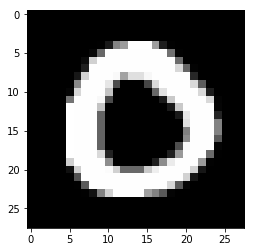

In [17]:
plt.imshow(zero_img, cmap = 'gray')

In [18]:
#We'll try to fit a model now

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_val , y_train, y_val = train_test_split( features, target, test_size = 0.15, random_state = 0 )

In [21]:
x_train.shape , x_val.shape

((35700, 784), (6300, 784))

In [22]:
#Let's try to implement it using a Decision Tree

In [23]:
my_tree1 = tree.DecisionTreeClassifier()

In [24]:
my_tree1.fit( x_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [40]:
my_tree1.score( x_val, y_val )

0.85968253968253971

In [41]:
# How can we improve our score
# Lets just try to make the image binary i.e only consisting of 1 and 0

In [43]:
#For all values greater than zero make them 1.0
features[features > 0.0] = 1.0

In [45]:
features[4,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1

In [46]:
x_train2 , x_val2 , y_train2 , y_val2 = train_test_split( features, target, test_size = 0.15, random_state = 0 )

In [47]:
#Now Let's make another classifier
my_tree2 = tree.DecisionTreeClassifier()

In [48]:
my_tree2.fit( x_train2, y_train2 )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [49]:
my_tree2.score( x_val2, y_val2 )

0.87095238095238092

In [51]:
#As we can see, We have improved 
#But can we further improve
#Let's try using another algorithm i.e. SVM

In [52]:
#As we know, we get better score while using x_train2 and y_train2 
#So there is no need to use x_train and y_train
#We'll try to use the parameters as simple as possible at first
model = svm.SVC(kernel = 'linear', C = 1.0)

In [53]:
model.fit( x_train2, y_train2 )

/home/dheer1206/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [428]:
model.score( x_val2, y_val2 )

0.92063492063492058

In [55]:
#So We can see that We have improved a lot .
#but can we Do better

In [56]:
#Lets try to tweak the svm parameters
model2 = svm.SVC( kernel='rbf', C = 5.0 , gamma = 0.05 )

In [433]:
model2.fit(x_train2, y_train2)

/home/dheer1206/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [432]:
model2.score(x_val2, y_val2)

0.9663492063492064

In [67]:
#Cool We have improved a lot
#Its time to fit our model to the complete training set

In [62]:
final_model = svm.SVC( kernel='rbf', C = 5.0 , gamma = 0.05 )

In [64]:
target = target.reshape(42000,)

In [65]:
target.shape

(42000,)

In [151]:
features.shape

(42000, 784)

In [66]:
final_model.fit( features, target )

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [173]:
#Kaggle submission
"""
test = pd.read_csv("/home/dheer1206/Downloads/datasets/hand/test.csv")
test = test * ( 1.0/255.0 )
test[test > 0.0] = 1.0
output = final_model.predict(test)
im_id = np.linspace(1,28000,28000).astype('int32')
df = pd.DataFrame(output,im_id,columns=['Label'])
df.to_csv("final_out.csv", index_label = ['ImageId'])
"""

'\ntest = pd.read_csv("/home/dheer1206/Downloads/datasets/hand/test.csv")\ntest = test * ( 1.0/255.0 )\ntest[test > 0.0] = 1.0\noutput = final_model.predict(test)\nim_id = np.linspace(1,28000,28000).astype(\'int32\')\ndf = pd.DataFrame(output,im_id,columns=[\'Label\'])\ndf.to_csv("final_out.csv", index_label = [\'ImageId\'])\n'

In [68]:
#Now Let's test this model on our own examples

In [617]:
#Lets import our image
my_image = mpimg.imread("/home/dheer1206/Documents/image.png")

In [618]:
my_image.shape

(200, 200)

In [619]:
#Lets rescale our image
from skimage.transform import resize
my_image = resize(my_image, (28,28) , mode = 'reflect' )

In [620]:
my_image.shape

(28, 28)

In [621]:
#First we'll invert our image
my_image = 1.0 - my_image

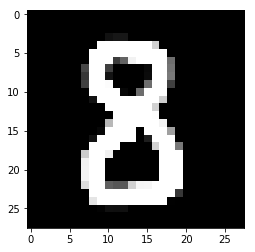

In [622]:
plt.imshow(my_image , cmap = 'gray')

In [623]:
#Now we'll convert our image to binary
my_image[my_image > 0.0] = 1.0

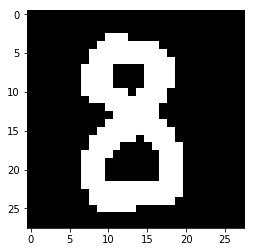

In [624]:
plt.imshow(my_image , cmap='gray')

In [625]:
#Now We'll convert it into a vector
my_image = my_image.reshape( 784, 1 )

In [626]:
my_image.shape

(784, 1)

In [1]:
final_model.predict(my_image.T)

NameError: name 'final_model' is not defined

In [628]:
#The End..... :)